In [27]:
%matplotlib inline

import matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import multivariate_normal
import os
from dirichlet import simplex
from plot_utils import errorBars

os.chdir('/Users/sbittner/Documents/efn/');

"""
exp_fam = 'normal';
K_eta = 100;
M = 1000;
D_Z = 40;
flow_id = 'linear1';
L = 8;
opt_method = 'adam';
lr_order = -4;
"""
exp_fam = 'dirichlet';
D = 4;
flow_id = '9ST_1S';
lr_order = -2;

modelstr = 'dirichlet_architecture_D=%d_%s_lr=%d.npz' % (D, flow_id, lr_order);

basedir = '/Users/sbittner/Documents/efn/results/dirichlet_architecture_search/';

fname = basedir + modelstr;
X = np.load(fname);

train_R2s = X['R2s'];
train_KLs = X['KLs'];
print(train_R2s.shape);
check_diagnostic_rate = X['check_rate'];
nits = check_diagnostic_rate*train_R2s.shape[0];
its = np.arange(nits);
fontsize = 20;


(100, 1)


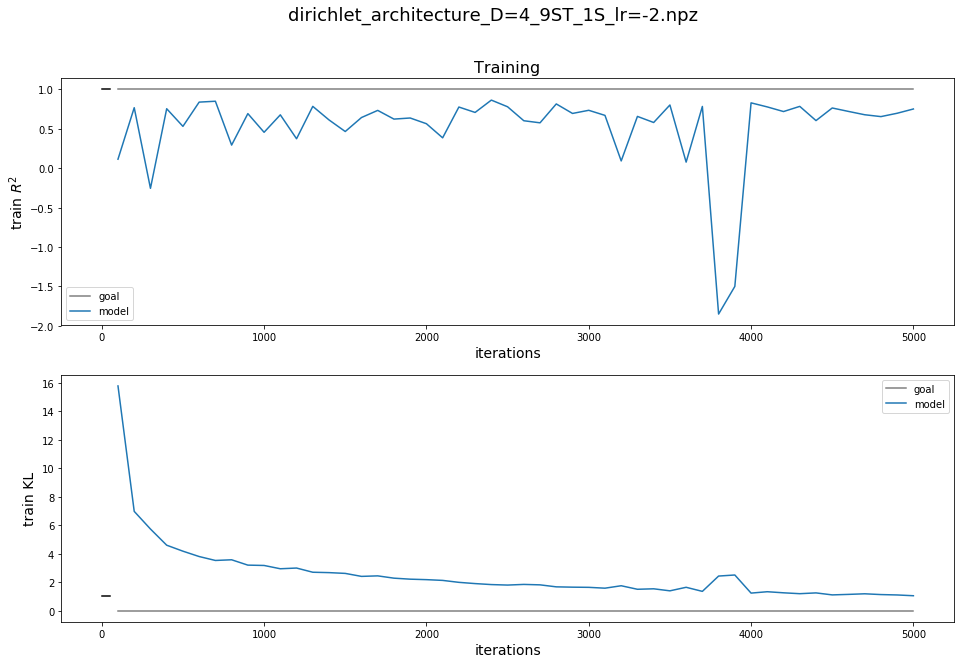

In [28]:
fontsize = 14;
N = train_R2s.shape[0]//2;
K_eta = train_R2s.shape[1];
its = check_diagnostic_rate*np.arange(1,N+1, dtype=float);
its = np.tile(np.expand_dims(its, 1), [1,K_eta]);
its_vec = np.reshape(its, (N*K_eta,));
train_R2s_vec = np.reshape(train_R2s[:N,:], (N*K_eta,))
train_KLs_vec = np.reshape(train_KLs[:N,:], (N*K_eta,))
size = np.ones((N*K_eta,));
fig = plt.figure(figsize=(16,10));
    
fig.add_subplot(2,1,1);
plt.plot([np.min(its), np.max(its)], [1,1], 'tab:gray');
plt.plot(its_vec, train_R2s_vec,size,'k-');
plt.legend(['goal', 'model']);
plt.xlabel('iterations', fontsize=fontsize);
plt.xlabel('iterations', fontsize=fontsize);
plt.ylabel('train $R^2$', fontsize=fontsize)
plt.title('Training', fontsize=fontsize+2);
#plt.ylim([0,1]);
plt.suptitle(modelstr, fontsize=fontsize+4)
    
fig.add_subplot(2,1,2);
plt.plot([np.min(its), np.max(its)], [0,0], 'tab:gray');
plt.plot(its_vec, train_KLs_vec,size,'k-');
plt.legend(['goal', 'model']);
plt.xlabel('iterations', fontsize=fontsize);
plt.ylabel('train KL', fontsize=fontsize)
#plt.ylim([0,1]);


plt.show();


In [10]:
print('final r^2', train_R2s[-1])
print('final KL', train_KLs[-1])

final r^2 [0.89731949]
final KL [1.23309723]


980


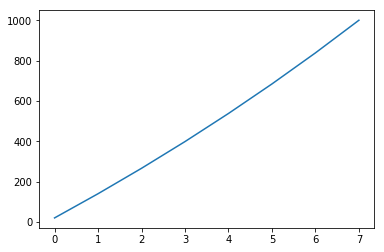

20 1000
[  20.          139.89874811  265.94483648  398.453446    537.75591722
  684.20057885  838.15361885 1000.        ]


In [40]:
num_theta_params = 1000;
ncons = 20;

tau = 20;
L = 8;

A = num_theta_params-ncons;
print(A);
l = np.arange(L);
upl = np.exp(l/tau);
upl = upl - upl[0];
upl = A*((upl) / upl[-1]) + ncons;

plt.figure();
plt.plot(l, upl);
plt.show();

print(ncons, num_theta_params)
print(upl);








